# 14)

#### La aceleración gravotatoria viene dada por
### $\vec{a} = - \frac{GM(<r)}{r^2} \hat{r}$
#### Y la aceleración centrípeta en un movimiento circular se puede escribir como
### $\vec{a}_c = - \frac{v^2}{r} \hat{r}$
#### Entonces, la velocidad circular de un objeto a una distancia $r$ bajo la acción de un campo gravitatorio generado por $M(<r)$ se escribe como
### $v_c(r) = \sqrt{\frac{GM(<r)}{r}}$
#### En el caso del radio virial $(r = r_V)$ resulta
### $v_V = \sqrt{\frac{GM_V}{r_V}}$

#### Ahora, para el caso de una esfera isoterma $(\rho(r) \propto r^{-2})$ se cumple que $v_c(r) = cte$. Veamos esto:
### $\rho(r) = \rho_0 (\frac{r_0}{r})^2$
#### La masa integrada total de un perfil de masa $\rho(r)$ viene dada por
### $M(<r) = 4 \pi \int^r_0 \rho(r') r'^2 dr'$
#### Entonces, para un esfera isoterma
### $\Rightarrow M(<r) = 4\pi \rho_0 r_0^2 r$
### $\Rightarrow v^2(r) = 4\pi G \rho_0 r_0^2 = v^2_V$
#### Es decir,
### $\frac{v^2_V}{4 \pi G} = \rho_0 r^2_0$
### $\frac{v^2_V}{4 \pi G r^2} = \rho_0 (\frac{r_0}{r})^2$
### $\frac{v^2_V}{4 \pi G r^2} = \rho(r)$

# 15)

#### Un perfil de densidad de masa **NFW** es un *double power-law* $\rho(r) = \frac{\rho_0}{(\frac{r}{r_0})^{\gamma} [1 + (\frac{r}{r_0})^{\alpha}]^{\frac{\beta - \gamma}{\alpha}}}$ con $(\alpha,\beta,\gamma) = (1,3,1)$. Es decir,
### $\rho(r) = \frac{\rho_0}{(\frac{r}{r_0})(1+(\frac{r}{r_0})^2)}$
#### Para obtener su perfil de masa integrada, calculamos
### $M(<r) = 4 \pi \int^r_0 \rho(r') r'^2 dr'$
### $M(<r) = 4\pi \rho_0 r_0^3 [ln(1+\frac{r}{r_0}) + \frac{- \frac{r}{r_0}}{1 + \frac{r}{r_0}}]$
#### Si escribimos $\rho_0 = \overline{\rho} \delta_c$; $x = \frac{r}{r_V}$ y $c = \frac{r_V}{r_0}$, resulta
### $M(<r) = 4\pi \overline{\rho} \delta_c r_0^3 [ln(1+xc) - \frac{xc}{1+xc}]$
#### Por otro lado, el perfil de velocidad circular de un NFW viene dado por:
### $v_c(r) = \sqrt{\frac{GM(<r)}{r}}$
### $v_c(r) = \sqrt{4 \pi G \rho_0 r_0^3 (\frac{-1}{r_0+r} + \frac{ln(1 + \frac{r}{r_0})}{r})}$
#### O, escrita en términos de la $v_V, x$ y $c$:
### $v_c(x) = v_V \sqrt{\frac{1}{x} \frac{f(cx)}{f(c)}}$
### $f(X) = ln(1 + X) - \frac{X}{1+X}$
#### Grafiquemos:

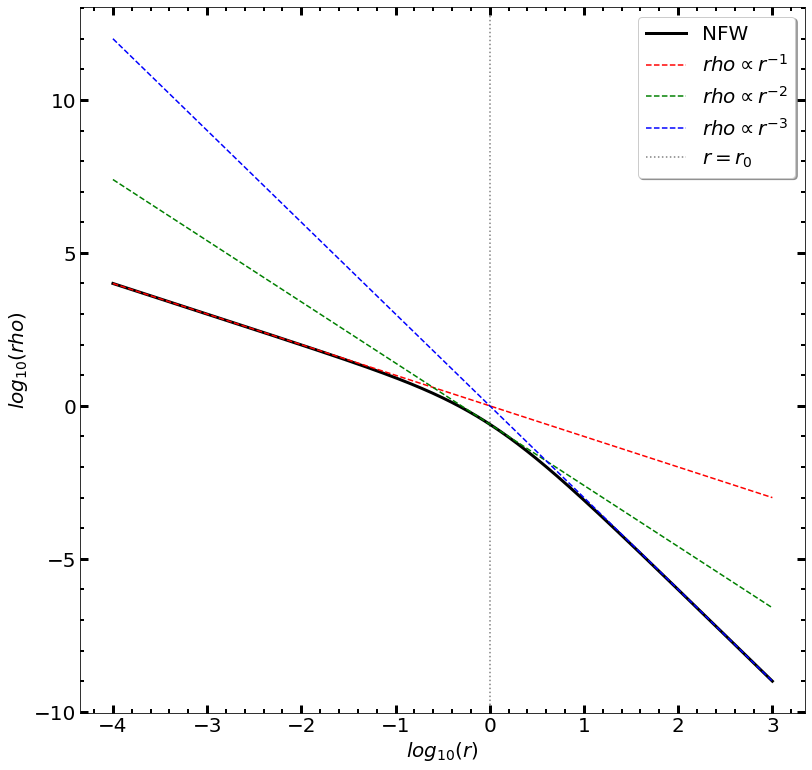

In [1]:
import pandas as pd #librería para datos
import matplotlib.pyplot as plt #para el hist
from scipy import stats as st
import numpy as np
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                           AutoMinorLocator)
from numpy import linalg as LA

#dominio
r = np.logspace(-4,3,1000)
#ctes = 1
rho_0 = 1
a = 1
#NFW
rho = rho_0/((r/a)*(1+(r/a))**2)

aux1 = rho_0*a/r # r << a
aux2 = rho_0*(a/r)**3 # r >> a
aux3 = rho_0*(0.5*a/r)**2 # r ~ a

plt.figure(figsize=(13,13))

plt.plot(np.log10(r),np.log10(rho),c='k',lw=3,label='NFW')

plt.plot(np.log10(r),np.log10(aux1),c='r',ls='--',alpha=1,label='$rho \propto r^{-1}$')
plt.plot(np.log10(r),np.log10(aux3),c='g',ls='--',alpha=1,label='$rho \propto r^{-2}$')
plt.plot(np.log10(r),np.log10(aux2),c='b',ls='--',alpha=1,label='$rho \propto r^{-3}$')

plt.axvline(np.log10(a),c='k',ls=':',alpha=0.5,label='$r = r_0$')

plt.xlabel('$log_{10}(r)$',fontsize=20)
plt.ylabel('$log_{10}(rho)$',fontsize=20)

plt.tick_params(labelsize=20,width=3,length=8,direction='in',bottom=True, top=True, left=True, right=True)

ax = plt.gca()
ax.xaxis.set_minor_locator(AutoMinorLocator())
ax.yaxis.set_minor_locator(AutoMinorLocator())

ax.tick_params(which='minor',length=4,direction='in',width=2,bottom=True, top=True, left=True, right=True)

plt.legend(fontsize=20,shadow=True);

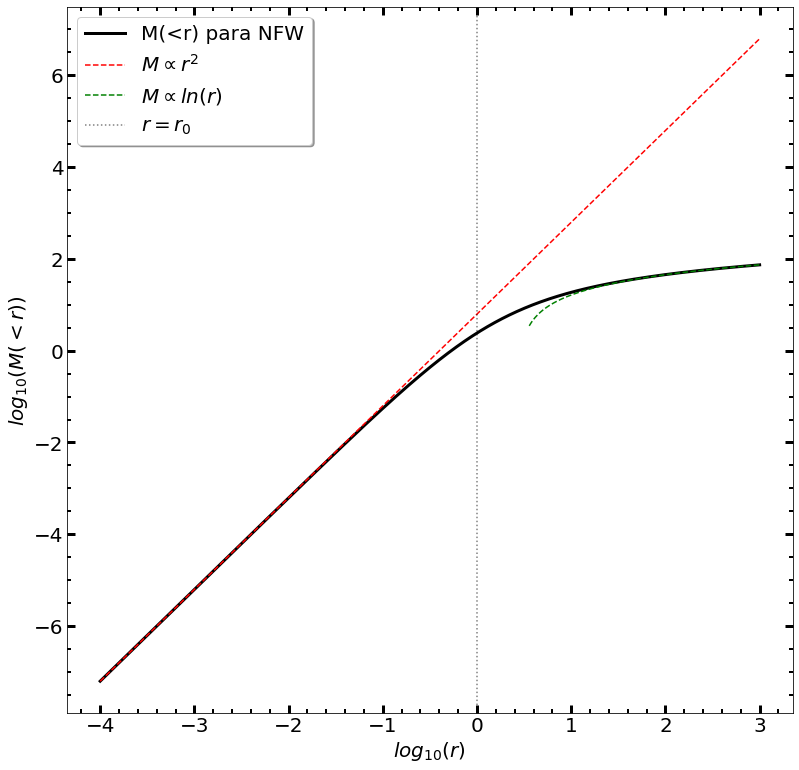

In [2]:
M = 4*np.pi*rho_0*(a**3)*((-r/a)/(1+r/a) + np.log(1+r/a))

aux1 = 4*np.pi*rho_0*(a**3)*(r/a)**2*0.5 # r << a
aux2 = 4*np.pi*rho_0*(a**3)*(-1+np.log(r[650:]/a)) # r << a

plt.figure(figsize=(13,13))

plt.plot(np.log10(r),np.log10(M),c='k',lw=3,label='M(<r) para NFW')
plt.plot(np.log10(r),np.log10(aux1),c='r',ls='--',label='$M \propto r^{2}$')
plt.plot(np.log10(r[650:]),np.log10(aux2),c='g',ls='--',label='$M \propto ln(r)$')

plt.axvline(np.log10(a),c='k',ls=':',alpha=0.5,label='$r = r_0$')

plt.xlabel('$log_{10}(r)$',fontsize=20)
plt.ylabel('$log_{10}(M(<r))$',fontsize=20)

plt.tick_params(labelsize=20,width=3,length=8,direction='in',bottom=True, top=True, left=True, right=True)

ax = plt.gca()
ax.xaxis.set_minor_locator(AutoMinorLocator())
ax.yaxis.set_minor_locator(AutoMinorLocator())

ax.tick_params(which='minor',length=4,direction='in',width=2,bottom=True, top=True, left=True, right=True)

plt.legend(fontsize=20,shadow=True);

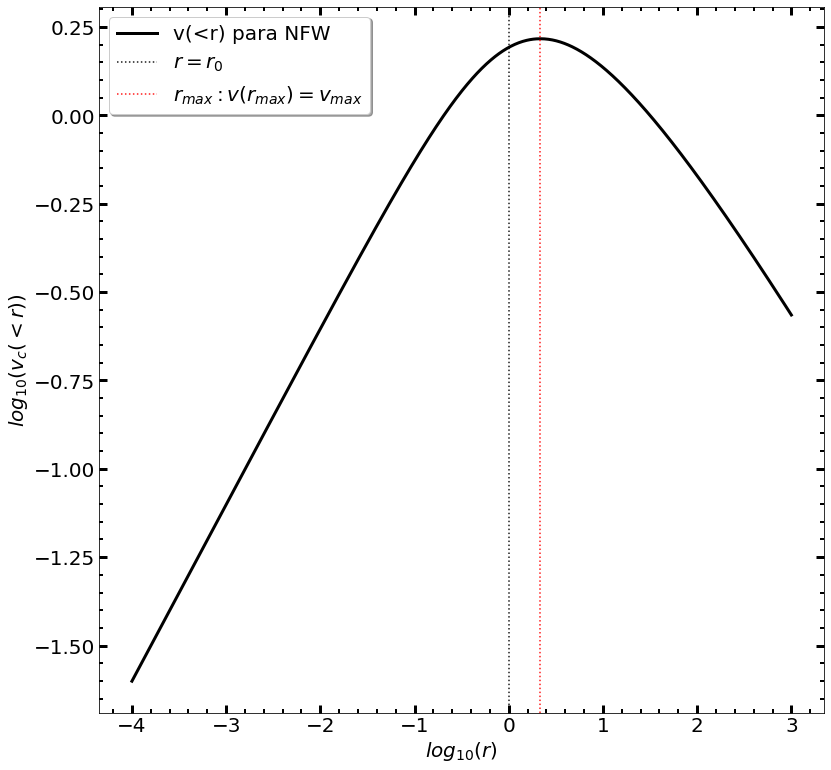

In [3]:
G = 1 #Ysi...
v = np.sqrt(G*M/r)

plt.figure(figsize=(13,13))

plt.plot(np.log10(r),np.log10(v),c='k',lw=3,label='v(<r) para NFW')

plt.axvline(np.log10(a),c='k',ls=':',alpha=0.9,label='$r = r_0$')
r_max = 2.1626 * a #ref: JoBovy. Busca las raíces de la func que es la derivada = 0...
plt.axvline(np.log10(r_max),c='r',ls=':',alpha=0.9,label='$r_{max}: v(r_{max}) = v_{max}$')

plt.xlabel('$log_{10}(r)$',fontsize=20)
plt.ylabel('$log_{10}(v_c(<r))$',fontsize=20)

plt.tick_params(labelsize=20,width=3,length=8,direction='in',bottom=True, top=True, left=True, right=True)

ax = plt.gca()
ax.xaxis.set_minor_locator(AutoMinorLocator())
ax.yaxis.set_minor_locator(AutoMinorLocator())

ax.tick_params(which='minor',length=4,direction='in',width=2,bottom=True, top=True, left=True, right=True)

plt.legend(fontsize=20,shadow=True);

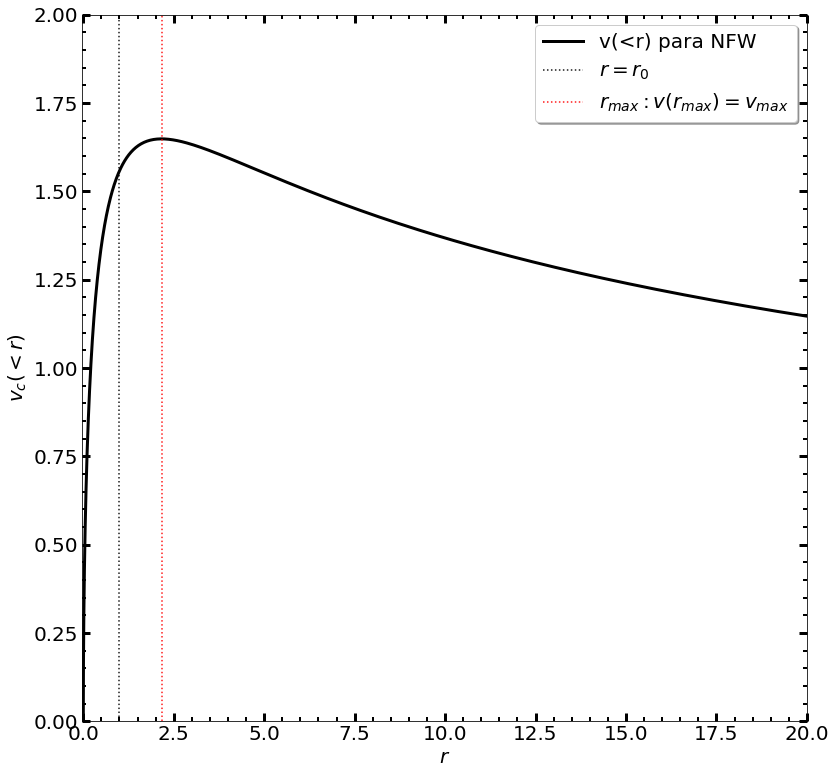

In [4]:
plt.figure(figsize=(13,13))

plt.plot(r,v,c='k',lw=3,label='v(<r) para NFW')

plt.axvline(a,c='k',ls=':',alpha=0.9,label='$r = r_0$')
r_max = 2.1626 * a #ref: JoBovy. Busca las raíces de la func que es la derivada = 0...
plt.axvline(r_max,c='r',ls=':',alpha=0.9,label='$r_{max}: v(r_{max}) = v_{max}$')

plt.xlabel('$r$',fontsize=20)
plt.ylabel('$v_c(<r)$',fontsize=20)

plt.xlim(-0.05,20)
plt.ylim(0,2)

plt.tick_params(labelsize=20,width=3,length=8,direction='in',bottom=True, top=True, left=True, right=True)

ax = plt.gca()
ax.xaxis.set_minor_locator(AutoMinorLocator())
ax.yaxis.set_minor_locator(AutoMinorLocator())

ax.tick_params(which='minor',length=4,direction='in',width=2,bottom=True, top=True, left=True, right=True)

plt.legend(fontsize=20,shadow=True);

#### Ahora calculemos la pendiente logarítmica de un perfil NFW $\rho(r) = \frac{\rho_0}{(\frac{r}{r_0})(1+(\frac{r}{r_0})^2)}$:
### $\frac{d ln(\rho)}{d ln(r)}$
#### Como cálculo auxiliar, sabemos que
### $\frac{d}{dr} = \frac{1}{r} \frac{d}{d ln(r)}$
#### Entonces,
### $\frac{d ln(\rho)}{d ln(r)} = r \frac{d ln(\rho)}{dr}$
#### Donde
### $ln(\rho) = ln(\rho_0) - ln(\frac{r}{r_0}) - 2ln(1 + \frac{r}{r_0})$
### $\therefore \frac{d ln(\rho)}{d ln(r)} = -1 - \frac{2r}{r_0 + r}$
#### Graficamos:

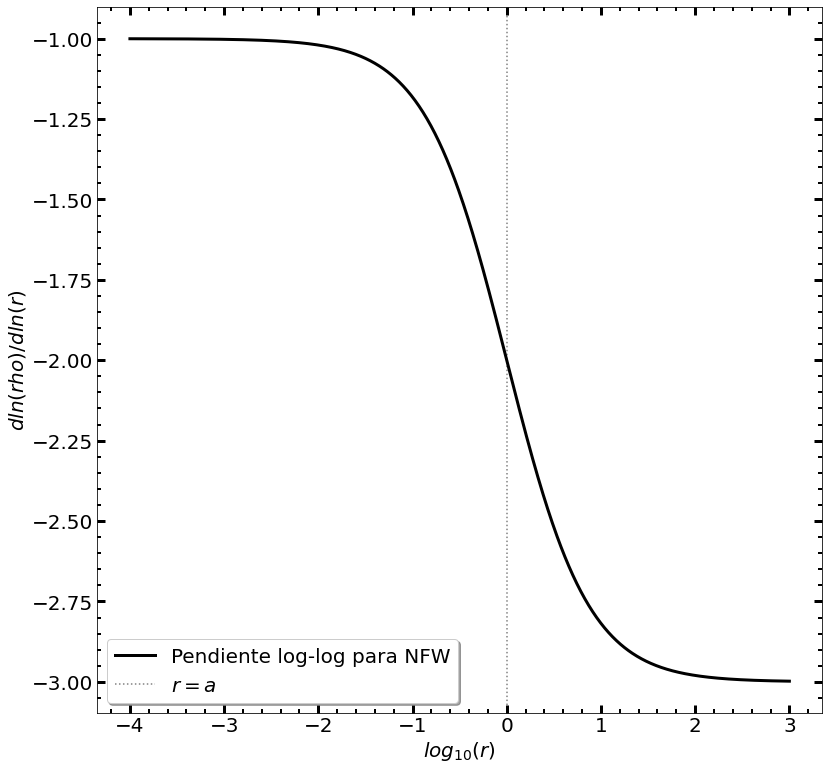

In [5]:
pend = -1 -2/(1+(a/r))

plt.figure(figsize=(13,13))

plt.plot(np.log10(r),pend,c='k',lw=3,label='Pendiente log-log para NFW')

plt.axvline(np.log10(a),c='k',ls=':',alpha=0.5,label='$r = a$')

plt.xlabel('$log_{10}(r)$',fontsize=20)
plt.ylabel('$d ln(rho)/d ln(r)$',fontsize=20)

plt.tick_params(labelsize=20,width=3,length=8,direction='in',bottom=True, top=True, left=True, right=True)

ax = plt.gca()
ax.xaxis.set_minor_locator(AutoMinorLocator())
ax.yaxis.set_minor_locator(AutoMinorLocator())

ax.tick_params(which='minor',length=4,direction='in',width=2,bottom=True, top=True, left=True, right=True)

plt.legend(fontsize=20,shadow=True);

#### *Que es lo que veíamos en el primer grafico, de $\rho(r)_{NFW}$.*

# 16)
*Hecho en ***20)***...*

# 17)

#### Queremos obtener la pendiente logarítmica de un perfil de densidad de masa de **Einasto**:
### $\rho(r) = \rho_{-2} \text{exp}[\frac{-2}{\alpha}((\frac{r}{r_{-2}})^{\alpha} -1)]$
#### Entonces,
### $ln(\rho) = ln(\rho_0) + \frac{-2}{\alpha} ((\frac{r}{r_0})^{\alpha} -1)$
### $\therefore \frac{d ln(\rho)}{d ln(r)} = r \frac{d ln(\rho)}{dr} = -2 (\frac{r}{r_0})^{\alpha}$

# 18)
#### Queremos encontrar la Función Distribución para una esfera isotrópica $f(\epsilon,L^2) = f(\epsilon)$ *("Ergodic Hernquist", dado a que sólo depende de la energía de sistema)*:
### $\rho(r) = \int f(r,\vec{v}) d \vec{v}$
#### Definimos
### $\Psi = -\Phi + \Phi_0$ y $\epsilon = -E + \Phi_0 = \Psi - v^2/2$
#### Y resulta
### $\rho(r) = 4 \pi \int_0^{\epsilon} \sqrt{2(\Psi - \epsilon)} f(\epsilon) d\epsilon$
#### Quiero encontrar $f(\epsilon)$ a partir de esta ecuación. Derivemos respecto de $\Psi$:
### $\frac{d \rho(\Psi)}{d \Psi} = \sqrt{8} \pi 2 \frac{d}{d \Psi} \int_0^{\epsilon} \sqrt{\Psi - \epsilon} f(\epsilon) d\epsilon$
### $\frac{1}{\sqrt{8}\pi} \frac{d \rho(\Psi)}{d \Psi} = \int_0^{\epsilon} \frac{f(\epsilon)}{\sqrt{\Psi - \epsilon}} d\epsilon$
#### Y esta es una integral de Abel *(o "Volterra integral equation of 2º kind")*, cuya forma general es
### $F(X) = \int_0^X \frac{\phi(s)}{\sqrt{X-s}} ds$
### $\Rightarrow \phi(X) = \frac{1}{\pi} [\frac{F(0)}{\sqrt{X}} + \int_0^X \frac{F'(t)}{\sqrt{X-t}} dt]$
#### Aplicado a nuestro caso, podemos obtener $f(\epsilon)$:
### $f(\epsilon) = \frac{1}{\sqrt{8}\pi^2} [(\frac{d \rho(\Psi)}{d \Psi})_{\Psi=0} \cdot \frac{1}{\sqrt{\epsilon}} + \int_0^{\epsilon} \frac{d^2 \rho}{d \Psi^2} \frac{d \Psi}{\sqrt{\epsilon - \Psi}}]$

# 19)
#### Un perfil de densidad de Hernquist es una *double power-law* de la forma
### $\rho(r) = \frac{\rho_0}{(\frac{r}{r_0})(1 + \frac{r}{r_0})^3}$
#### Esto significa que su masa integrada total es finita:
### $M(<r) = 4\pi \int_0^r \rho(r') r'^2 dr' = 2 \pi \rho_0 r_0^3 [\frac{(\frac{r}{r_0})^2}{(1+\frac{r}{r_0})^2}]$
### $M(r \rightarrow \infty) = 2 \pi \rho_0 r_0^3$
#### Y el potencial viene dado por:
### $\Phi(r) = -G \int_r^{\infty} \frac{M(r')}{r'^2} dr'$
### $\Phi(r) = -2 \pi G \rho_0 r_0^2 [\frac{1}{1+\frac{r}{r_0}}]$
### $\Phi(r) = \frac{-GM}{r+r_0} = \frac{-GM}{r_0} \frac{1}{1+\frac{r}{r_0}}$
#### Entonces, para obtener la **DF** $f(\epsilon)$, defino
### $\frac{r}{r_0} = \frac{1}{\tilde{\Psi}} -1$; $\tilde{\Psi} = \frac{-\Phi r_0}{GM}$
#### Y también
### $\tilde{\rho} = \frac{\rho}{M} = \frac{1}{2 \pi r_0^3} \frac{\tilde{\Psi}^4}{1-\tilde{\Psi}}$
#### Ahora, para poder calcular $f(\epsilon)$, debo calcular 
### $(\frac{d \tilde{\rho}}{d \Psi})_{\Psi=0=\tilde{\Psi}}$ y $\frac{d^2 \tilde{\rho}}{d \Psi^2}$
#### Con
### $\frac{d }{d \Psi} = \frac{\partial }{\partial \tilde{\Psi}} \frac{\partial \tilde{\Psi}}{\partial \Psi} = \frac{r_0}{GM} \frac{\partial }{\partial \tilde{\Psi}}$; dado a que $\Psi = -\Phi + \Phi_0$, y como $\Phi(r \rightarrow \infty) = 0 \Rightarrow \Phi_0 = 0$.
#### Entonces, aplicando la ecuación
### $f(\epsilon) = \frac{1}{\sqrt{8}\pi^2} [(\frac{d \tilde{\rho}}{d \Psi})_{\Psi=0} \cdot \frac{1}{\sqrt{\epsilon}} + \int_0^{\epsilon} \frac{d^2 \tilde{\rho}}{d \Psi^2} \frac{d \Psi}{\sqrt{\epsilon - \Psi}}]$
#### Obtenemos, para $\tilde{\epsilon} = \frac{-E r_0}{GM}$:
### $f(\tilde{\epsilon}) = \frac{\sqrt{\tilde{\epsilon}}}{(1-\tilde{\epsilon})^2} [(1-2\tilde{\epsilon})(8\tilde{\epsilon}^2-8\tilde{\epsilon}-3) + \frac{3 arcsen(\sqrt{\tilde{\epsilon}})}{\sqrt{\tilde{\epsilon}(1-\tilde{\epsilon})}}] \cdot \frac{1}{\sqrt{2}(2\pi)^3(GMr_0)^{3/2}}$
#### Grafiquemos todo:

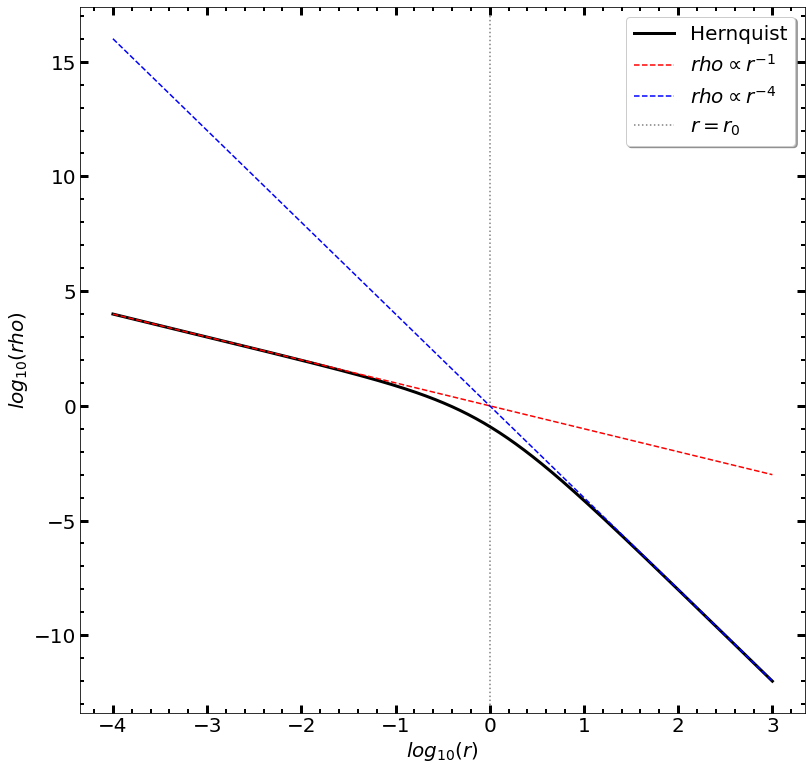

In [6]:
r = np.logspace(-4,3,1000) #dominio
rho_0 = 1
a = 1
rho = rho_0/((r/a)*(1+(r/a))**3) #Hernquist

aux1 = rho_0*a/r # r << a
aux2 = rho_0*(a/r)**4 # r >> a

plt.figure(figsize=(13,13))

plt.plot(np.log10(r),np.log10(rho),c='k',lw=3,label='Hernquist')

plt.plot(np.log10(r),np.log10(aux1),c='r',ls='--',alpha=1,label='$rho \propto r^{-1}$')
plt.plot(np.log10(r),np.log10(aux2),c='b',ls='--',alpha=1,label='$rho \propto r^{-4}$')

plt.axvline(np.log10(a),c='k',ls=':',alpha=0.5,label='$r = r_0$')

plt.xlabel('$log_{10}(r)$',fontsize=20)
plt.ylabel('$log_{10}(rho)$',fontsize=20)

plt.tick_params(labelsize=20,width=3,length=8,direction='in',bottom=True, top=True, left=True, right=True)

ax = plt.gca()
ax.xaxis.set_minor_locator(AutoMinorLocator())
ax.yaxis.set_minor_locator(AutoMinorLocator())

ax.tick_params(which='minor',length=4,direction='in',width=2,bottom=True, top=True, left=True, right=True)

plt.legend(fontsize=20,shadow=True);

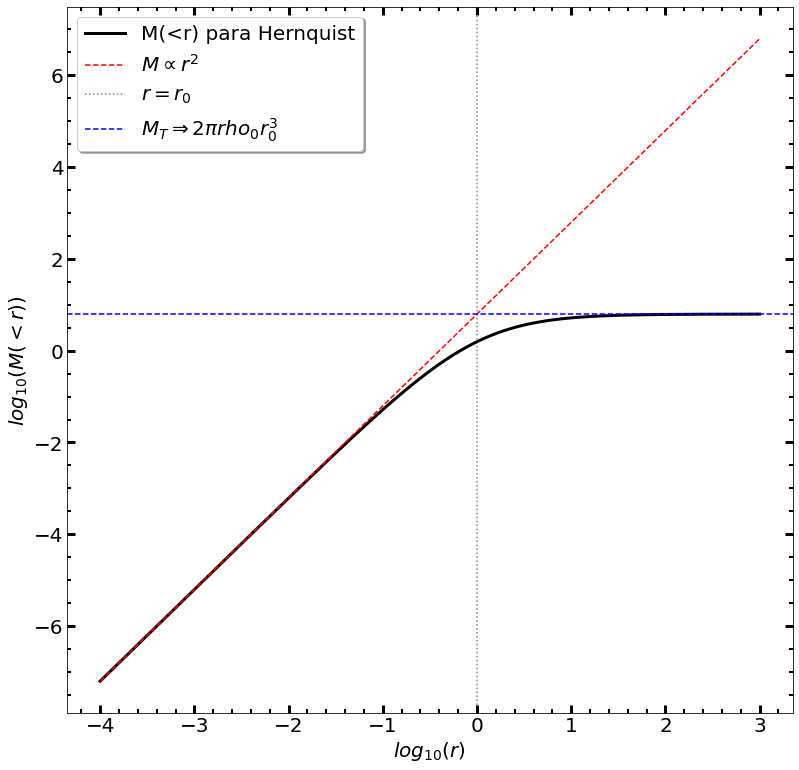

In [7]:
M = 2*np.pi*rho_0*(a**3)*((r/a)/(1+r/a))**2

aux1 = 4*np.pi*rho_0*(a**3)*(r/a)**2*0.5 # r << a

plt.figure(figsize=(13,13))

plt.plot(np.log10(r),np.log10(M),c='k',lw=3,label='M(<r) para Hernquist')
plt.plot(np.log10(r),np.log10(aux1),c='r',ls='--',label='$M \propto r^{2}$')

plt.axvline(np.log10(a),c='k',ls=':',alpha=0.5,label='$r = r_0$')
plt.axhline(np.log10(2*np.pi*rho_0*(a**3)),c='b',ls='--',label='$M_T \Rightarrow 2\pi rho_0 r_0^3$')

plt.xlabel('$log_{10}(r)$',fontsize=20)
plt.ylabel('$log_{10}(M(<r))$',fontsize=20)

plt.tick_params(labelsize=20,width=3,length=8,direction='in',bottom=True, top=True, left=True, right=True)

ax = plt.gca()
ax.xaxis.set_minor_locator(AutoMinorLocator())
ax.yaxis.set_minor_locator(AutoMinorLocator())

ax.tick_params(which='minor',length=4,direction='in',width=2,bottom=True, top=True, left=True, right=True)

plt.legend(fontsize=20,shadow=True);

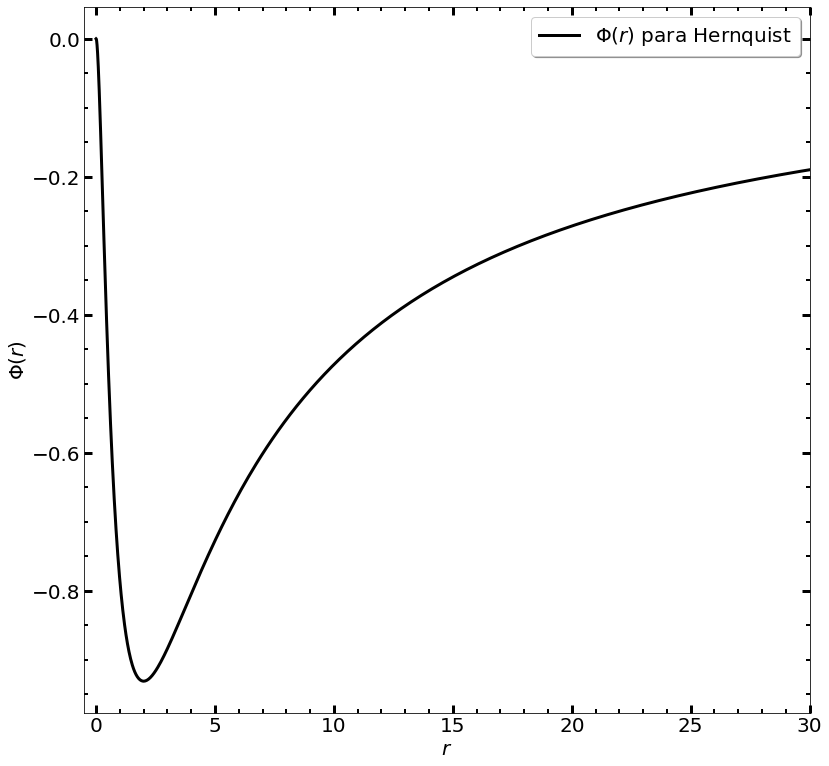

In [9]:
G = 1
pot = -G*M/(r+a)

plt.figure(figsize=(13,13))

plt.plot(r,pot,c='k',lw=3,label='$\Phi(r)$ para Hernquist')

#plt.axvline(np.log10(a),c='k',ls=':',alpha=0.5,label='$r = a$')
#plt.axhline(np.log10(2*np.pi*rho_0*(a**3)),c='b',ls='--',label='$M_T \Rightarrow 2\pi rho_0 a^3$')

plt.xlabel('$r$',fontsize=20)
plt.ylabel('$\Phi(r)$',fontsize=20)

plt.xlim(-0.5,30)

plt.tick_params(labelsize=20,width=3,length=8,direction='in',bottom=True, top=True, left=True, right=True)

ax = plt.gca()
ax.xaxis.set_minor_locator(AutoMinorLocator())
ax.yaxis.set_minor_locator(AutoMinorLocator())

ax.tick_params(which='minor',length=4,direction='in',width=2,bottom=True, top=True, left=True, right=True)

plt.legend(fontsize=20,shadow=True);

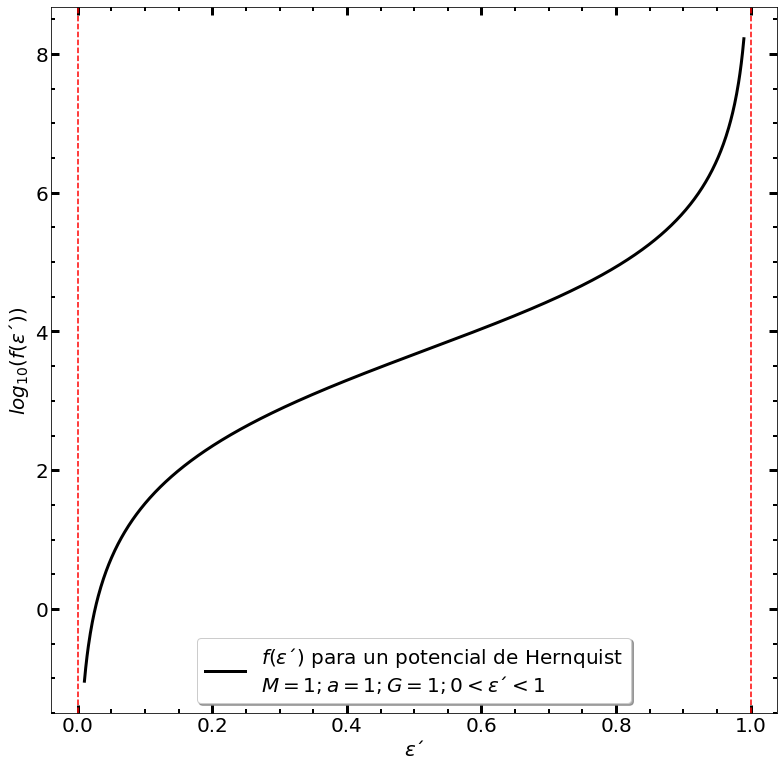

In [14]:
#Sampleamos epsilon', dejando M = m fijo = 1:
e = np.linspace(0.01,0.99,1000)
m = 1

alpha = np.sqrt(2)*(2*np.pi)**3 * (G*m*a)**1.5

func = alpha*np.sqrt(e)*(1-e)**-2 * ((1-2*e)*(8*e**2 - 8*e - 3) + 3*np.arcsin(np.sqrt(e))/np.sqrt(e*(1-e)))

plt.figure(figsize=(13,13))

plt.plot(e,np.log10(func),c='k',lw=3,label='$f(\epsilon´)$ para un potencial de Hernquist \n$M = 1; a = 1; G = 1; 0<\epsilon´<1$')

plt.axvline(0,c='r',ls='--')
plt.axvline(1,c='r',ls='--')

plt.xlabel('$\epsilon´$',fontsize=20)
plt.ylabel('$log_{10}(f(\epsilon´))$',fontsize=20)

plt.tick_params(labelsize=20,width=3,length=8,direction='in',bottom=True, top=True, left=True, right=True)

ax = plt.gca()
ax.xaxis.set_minor_locator(AutoMinorLocator())
ax.yaxis.set_minor_locator(AutoMinorLocator())

ax.tick_params(which='minor',length=4,direction='in',width=2,bottom=True, top=True, left=True, right=True)

plt.legend(fontsize=20,shadow=True);

#### **Acá, $\tilde{\epsilon} = \epsilon'$*.